In [76]:
from QfromPackage.Qfrom_mod import Qfrom
import numpy as np
import pandas as pd

**Qfrom Doku**

**Inhalt**

Einleitung

Methoden Überblick\
init\
Standart Listen Funktionen\
String zu Funktion\
Erweiterte Listen Funktionen\
Aggregation Funktionen\
Tabellen Funktionen\
Mathe Funktionen\
Export Funktionen\
Plot Funktionen\
Fortgeschrittene Funktionen

**Einleitung**

Die Qfrom-Klasse beinhaltet ist im wesentlichen ein Wrapper für eine numpy-array, welcher zusätzliche, einfach zu bedienende Methoden zur Datenverarbeitung bereitstellt.

Die bennenung der Klasse, sowie der Methoden orientiert sich lose an der SQL schreibweise.

**Methoden Überblick**

\_\_init\_\_

Zur initialisierung können verschiedene Datenquellen übergeben werden. Diese werden im Folgenden aufgeführt.

list, set, array, ...

In [77]:
l = [1, 2, 3]
q_l = Qfrom(l)

s = {1, 2, 3}
q_s = Qfrom(s)

a = np.array([1, 2, 3])
q_a = Qfrom(a)

print(q_l)
print(q_s)
print(q_a)

Qfrom([1 2 3])
Qfrom([1 2 3])
Qfrom([1 2 3])


generator, range, ...

In [78]:
r = range(5)
q_r = Qfrom(r)

print(q_r)

Qfrom([0 1 2 3 4])


In [79]:
def generator(n, num):
    for i in range(n):
        yield num

q_g = Qfrom(generator(5, 1))
print(q_g)

Qfrom([1 1 1 1 1])


dict und dataframe können nicht ohne Weiteres in eine array-Form gebracht werden. Um die benahmung der Key-Value-Paare(KVPs) bzw. der Spalten nicht zu verlieren werden die KVPs bzw. die Zeilen in Dictionaries umgewandelt, wobei Key der Spaltenbenahmung entspricht und Value den Zeilen-Wert enthält.

In [80]:
d = {'a':1, 'b':2, 'c':3}
q_d = Qfrom(d)

print(q_d)

Qfrom(	{'key': 'a', 'value': 1}
	{'key': 'b', 'value': 2}
	{'key': 'c', 'value': 3})


In [81]:
data = {'Tier': ['Hund', 'Katze', 'Vogel'],
        'Beine': [4, 4, 2]}

df = pd.DataFrame(data)
q_df = Qfrom(df)

print(q_df)

Qfrom(	{'Tier': 'Hund', 'Beine': 4}
	{'Tier': 'Katze', 'Beine': 4}
	{'Tier': 'Vogel', 'Beine': 2})


csv-string, csv-file -> (delimiter, headers)

Es kann sowohl ein csv-string sowie ein Dateipfad zu einer csv Datei übergeben werden.

In [82]:
csv = '''
a; b; c
1; 10; 100
2; 20; 200
'''
q_csv = Qfrom(csv, delimiter=';')

print(q_csv)

Qfrom(	{'a': 1, 'b': 10, 'c': 100}
	{'a': 2, 'b': 20, 'c': 200})


json-string, json-file

Es kann sowohl ein json-string sowie ein Dateipfad zu einer json Datei übergeben werden.

In [83]:
json = """
[
    {'a':1, 'b':2},
    {'a':3, 'b':4}
]
"""
q_j = Qfrom(json)

print(q_j)

Qfrom(	{'a': 1, 'b': 2}
	{'a': 3, 'b': 4})


In [84]:
json = "{'a':1, 'b':[1, 2]}"

q_j = Qfrom(json)

print(q_j)

Qfrom(	{'key': 'a', 'value': 1}
	{'key': 'b', 'value': [1, 2]})


**Standart Listen Funktionen**

\_\_len\_\_

In [85]:
q = Qfrom([1, 2, 3])
l = len(q)

print(l)

3


\_\_getitem\_\_

In [86]:
q = Qfrom([1, 2, 3, 4, 5])

item = q[2]
print(item)

slice_of_q = q[1::2]
print(slice_of_q)

3
Qfrom([2 4])


\_\_setitem\_\_

In [87]:
q = Qfrom([1, 2, 3, 4, 5])

q[0] = 6
print(q)

Qfrom([6 2 3 4 5])


\_\_contains\_\_

In [88]:
q = Qfrom([1, 2, 3])

print(2 in q)
print(0 in q)

True
False


\_\_iter\_\_

In [89]:
q = Qfrom([1, 2, 3])

for item in q:
    print(item)

1
2
3


\_\_str\_\_

In [90]:
q = Qfrom([1, 2, 3])
str_q = str(q)

print(str_q)

Qfrom([1 2 3])


concat(other)

Durch Concat lässt sich eine collection an Qfrom anfügen.

In [91]:
q = Qfrom([1, 2, 3])

qq = q.concat(q)
print(qq)

ql = q.concat([4, 5, 6])
print(ql)

Qfrom([1 2 3 1 2 3])
Qfrom([1 2 3 4 5 6])


add(item)

Da Qfrom auf einer Array aufbaut ist die Klasse nicht dazu gedacht eine dynamische Anzahl von Elementen zu halten. D.h. das anfügen von Elementen ist nicht besonders performant. Trotzdem ist es über die add-Funktion möglich Qfrom elementweise zu erweitern.

In [92]:
q = Qfrom([1, 2, 3])
q.add(4)

print(q)

Qfrom([1 2 3 4])


**String zu Funktion**

Für die meisten der Qfrom-Methoden können Funktionen als Parameter übergeben werden. Um Nutzung dieser Methoden zu vereinfachen können die gängigsten Tabellen-Funktionen als String abgekürzt übergeben werden. Der String wird von Qfrom in einen passenden lambda-Ausdruck übersetzt.

String -> lambda-Ausdruck

Lambda Kurzform:\
'x:x' -> lambda x:x\
'a, b: a+b' -> lambda a, b: a+b

Spalten selektieren:\
'1' -> lambda item: {'1': item[1]}

'x.a' -> lambda item: {'a': item['x']['a']}\
'x.a, x.b' -> lambda item: {'a': item['x']['a'], 'b': item['x']['b']}

'x.a as b' -> lambda item: {'b': item['x']['a']}\
'ab as a, cd as c' -> lambda item: {'a': item['ab'], 'c': item['cd']}

Spalten deselektieren:\
'-a' -> 'lambda item: {key:item[key] for key in item if key != "a"}'\
'-a, -b' -> 'lambda item: {key:item[key] for key in item if key not in ["a", "b"]}'

Predikat Funktionen:

Jede Zeichenfolge aus Buchstaben, welche nicht in Anführungszeichen steht, wird als Spaltenname erkannt und übersetzt. Da nur Zeichenfolgen vom Typ: [a-zA-Z\_\.0-9] erkannt werden, können beliebig komplexe Predikate gebildet werden. Diese können and, or, not, Klammersetzung, etc. enthalten.

'a == "b"' -> 'lambda item: item["a"] == "b"'\
'a < 1' -> 'lambda item: item["a"] < 1'\
'a > 1' -> 'lambda item: item["a"] > 1'\
'a <= 1' -> 'lambda item: item["a"] <= 1'\
'a >= 1' -> 'lambda item: item["a"] >= 1'

'x in ["a", "b", "c"]' -> lambda item: item["x"] in ["a", "b", "c"]

'x not in ["a", "b", "c"]' -> lambda item: item["x"] not in ["a", "b", "c"]

'0 < a < 1' -> 'lambda item: 0 < item["a"] < 1'\
'a == "b" and c == "d" -> 'lambda item: item["a"] == "b" and item["c"] == "d"'

Für ausgewählte Qfrom-Methoden wird der String anders übersetzt, als im Abschnitt Spalten selektieren beschrieben.
Dazu zählen:

flatten(select_collection, select_result) -> select_collection\
group_by(key, value) -> key\
order_by(key, reverse) -> key\
min(func) -> func\
max(func) -> func

Die abweichende Übersetzung:\
(String -> lambda-Ausdruck)

'x.a' -> lambda item: item['x']['a']\
'1' -> lambda item: item[1]

**Erweiterte Listen Funktionen**

select(func)\
Kurzform: s

Signatur:\
func(item) -> item

Iteriert über jedes Element in Qfrom und führt darauf func aus. Das Ergebnis wird in ein neues Qfrom geschrieben, welches zurückgegeben wird.

In [93]:
q = Qfrom([1, 2, 3])

result = q.select(lambda x:x+1)
print(result)

result = q.s(lambda x:x+1)
print(result)

Qfrom([2 3 4])
Qfrom([2 3 4])


where(predicate)\
Kurzform: w

Signatur:\
predicate(item) -> bool

Iteriert über jedes Element in Qfrom und führt darauf die predicate-Funktion aus. Ist das Ergebnis True wird das Element in ein neues Qfrom geschrieben, sonst nicht. Das neue Qfrom wird zurückgegeben.

In [94]:
q = Qfrom([1, 2, 3])

result = q.where(lambda x:x<3)
print(result)

result = q.w(lambda x:x<3)
print(result)

Qfrom([1 2])
Qfrom([1 2])


flatten(select_collection, select_result)\
Kurzform: f

Signatur:\
select_collection(item) -> collection\
select_result(parent, child) -> item

Iteriert über jedes Element in einem Qfrom gefüllt mit collections und concateniert diese collections zu einem neuen Qfrom. Das neue Qfrom wird zurückgegeben.\
Über select_collection lässt sich eine collection in einem item auswählen.

Über select_result lässt die Form des der Ausgabe-Items definieren. Hierfür werden das ursprüngliche item als parent und das aktuelle item aus der aktuellen collection als child übergeben.

In [95]:
q = Qfrom([[1, 2], [3, 4]])

result = q.flatten()
print(result)

result = q.f()
print(result)

Qfrom([1 2 3 4])
Qfrom([1 2 3 4])


In [96]:
q = Qfrom([{'a': [1, 2]}, {'a': [3, 4]}])

result = q.flatten('a')
print(result)

result = q.f('a')
print(result)

Qfrom([1 2 3 4])
Qfrom([1 2 3 4])


In [97]:
q = Qfrom([{'a': [1, 2]}, {'a': [3, 4]}])

result = q.flatten('a', lambda parent, child: (parent, child))
print(result)

result = q.f('a', lambda p, c: (p, c))
print(result)

Qfrom(	({'a': [1, 2]}, 1)
	({'a': [1, 2]}, 2)
	({'a': [3, 4]}, 3)
	({'a': [3, 4]}, 4))
Qfrom(	({'a': [1, 2]}, 1)
	({'a': [1, 2]}, 2)
	({'a': [3, 4]}, 3)
	({'a': [3, 4]}, 4))


group_by(key, value)\
Kurzform: g

Signatur:\
key(item) -> hashable\
value(item) -> item

Elemente des Qfroms werden nach key groupiert.

In [98]:
q = Qfrom([1, 2, 3, 4, 5])

result = q.group_by('x:x%2')
print(result)

result = q.g('x:x%2')
print(result)

Qfrom(	{'key': 1, 'value': [1, 3, 5]}
	{'key': 0, 'value': [2, 4]})
Qfrom(	{'key': 1, 'value': [1, 3, 5]}
	{'key': 0, 'value': [2, 4]})


In [99]:
q = Qfrom([{'a':1, 'b':10}, {'a':2, 'b':20}, {'a':1, 'b':30}])

result = q.group_by('a')
print(result)

result = q.g('a')
print(result)

Qfrom(	{'key': 1, 'value': [{'a': 1, 'b': 10}, {'a': 1, 'b': 30}]}
	{'key': 2, 'value': [{'a': 2, 'b': 20}]})
Qfrom(	{'key': 1, 'value': [{'a': 1, 'b': 10}, {'a': 1, 'b': 30}]}
	{'key': 2, 'value': [{'a': 2, 'b': 20}]})


In [100]:
q = Qfrom([{'a':1, 'b':10}, {'a':2, 'b':20}, {'a':1, 'b':30}])

result = q.group_by('a', 'b')
print(result)

result = q.g('a', 'b')
print(result)

Qfrom(	{'key': 1, 'value': [{'b': 10}, {'b': 30}]}
	{'key': 2, 'value': [{'b': 20}]})
Qfrom(	{'key': 1, 'value': [{'b': 10}, {'b': 30}]}
	{'key': 2, 'value': [{'b': 20}]})


order_by(key, reverse)\
Kurzform: o

Signatur:\
key(item) -> compareable\
reverse: bool

Elemente des Qfroms werden nach key geordnet. über den Parameter reverse lässt sich die Sortierreihenfolge umdrehen.

In [101]:
q = Qfrom([3, 1, 5, 2, 4])

result = q.order_by()
print(result)

result = q.o()
print(result)

Qfrom([1 2 3 4 5])
Qfrom([1 2 3 4 5])


In [102]:
q = Qfrom([3, 1, 5, 2, 4])

result = q.order_by(reverse=True)
print(result)

result = q.o(reverse=True)
print(result)

Qfrom([5 4 3 2 1])
Qfrom([5 4 3 2 1])


In [103]:
q = Qfrom([{'a':2}, {'a':3}, {'a':1}])

result = q.order_by('a')
print(result)

result = q.o('a')
print(result)

Qfrom(	{'a': 1}
	{'a': 2}
	{'a': 3})
Qfrom(	{'a': 1}
	{'a': 2}
	{'a': 3})


any(predicate)

Signatur:\
predicate(item) -> bool

Gibt True zurück, falls ein Element von Qfrom verschieden von False und 0 ist.\
Gibt False zurück falls alle Elemente False oder 0 sind, oder Qfrom leer.

Die predicate-Funktion wird auf jedes Elemengt von Qfrom angewandt. Anschließend wird wie beschrieben der Rückgabewert ermittelt.

In [104]:
q = Qfrom([1, 2, 3])
print(q.any())

q = Qfrom([])
print(q.any())

q = Qfrom([0, 0, 0])
print(q.any())

q = Qfrom([False, False, False])
print(q.any())

True
False
False
False


In [105]:
q = Qfrom([1, 2, 3])
print(q.any('x:x<1'))

q = Qfrom([{'a':1}, {'a':2}])
print(q.any('a>1'))

False
True


all(predicate)

Signatur:\
predicate(item) -> bool

Gibt True zurück, falls alle Elemente von Qfrom verschieden von False und 0 sind.\
Gibt False zurück falls mindestens ein Element False oder 0 ist.

Die predicate-Funktion wird auf jedes Elemengt von Qfrom angewandt. Anschließend wird wie beschrieben der Rückgabewert ermittelt.

In [106]:
q = Qfrom([1, 2, 3])
print(q.all())

q = Qfrom([])
print(q.all())

q = Qfrom([0, 1, 2])
print(q.all())

q = Qfrom([True, False, True])
print(q.all())

True
True
False
False


In [107]:
q = Qfrom([1, 2, 3])
print(q.all('x:x<3'))

q = Qfrom([{'a':1}, {'a':2}])
print(q.all('a>0'))

False
True


**Aggregation Funktionen**

sum(key)

Signatur:
key(item) -> num

In [108]:
q = Qfrom([1, 2, 3, 4, 5])
print(q.sum())

15


In [109]:
tab = '''
a,b
a,1
b,2
c,3
d,4
e,5
'''
q = Qfrom(tab)
print(q.sum('b'))

15


mean(key)

Signatur:
key(item) -> num

In [110]:
q = Qfrom([1, 2, 3, 4, 5])
print(q.mean())

3.0


In [111]:
tab = '''
a,b
a,1
b,2
c,3
d,4
e,5
'''
q = Qfrom(tab)
print(q.mean('b'))

3.0


median(key)

Signatur:
key(item) -> num

In [112]:
q = Qfrom([1, 2, 3, 10, 30])
print(q.median())

3.0


In [113]:
tab = '''
a,b
a,1
b,2
c,3
d,10
e,30
'''
q = Qfrom(tab)
print(q.median('b'))

3.0


var(key)

Signatur:
key(item) -> num

In [114]:
q = Qfrom([1, 2, 3, 10, 30])
print(q.var())

118.16000000000001


In [115]:
tab = '''
a,b
a,1
b,2
c,3
d,10
e,30
'''
q = Qfrom(tab)
print(q.var('b'))

118.16000000000001


aggregate(func)\
Kurzform: agg

Signatur:\
func(item, item) -> item

Durch aggregate lassen sich alle Werte von Qfrom zusammenfassen.

signatur: func(a, b) -> item

In [116]:
q = Qfrom([1, 2, 3])

result = q.aggregate('a,b:a+b')
print(result)

result = q.agg('a,b:a+b')
print(result)

6
6


**Tabellen Funktionen**

Da Qfrom ein Wrapper für eine numpy-array ist, ist Qfrom grundsätzlich nicht auf tabellarische Datenstrukturen beschränkt.

Da Daten oft in Tabellenform vorliegen, kann Qfrom eine Tabellenstruktur simulieren, indem jede Zeile der Tabelle durch ein Dict repräsentiert wird.

a, b, c\
1, 2, 3 ->  [{'a':1, 'b':2, 'c':3},\
4, 5, 6 ->   {'a':4, 'b':5, 'c':6},\
7, 8, 9 ->   {'a':7, 'b':8, 'c':9}]

Für diese Struktur werden angepasste Befehle bereitgestellt.

In [117]:
tab = '''
a,b,c
1,2,3
4,5,6
7,8,9
'''
q = Qfrom(tab)
print(q)

Qfrom(	{'a': 1, 'b': 2, 'c': 3}
	{'a': 4, 'b': 5, 'c': 6}
	{'a': 7, 'b': 8, 'c': 9})


edit_column(col_name, func)\
Kurzform: edit

Signatur:\
col_name: string\
func(item) -> item

In [118]:
q_e = q.edit('c', lambda x:x['c']*10)
print(q_e)

q_d = q.edit('d', 'x:"new col"')
print(q_d)

Qfrom(	{'a': 1, 'b': 2, 'c': 30}
	{'a': 4, 'b': 5, 'c': 60}
	{'a': 7, 'b': 8, 'c': 90})
Qfrom(	{'a': 1, 'b': 2, 'c': 3, 'd': 'new col'}
	{'a': 4, 'b': 5, 'c': 6, 'd': 'new col'}
	{'a': 7, 'b': 8, 'c': 9, 'd': 'new col'})


rename_column(col_name, new_name)\
Kurzform: rename

Signatur:\
col_name: string\
new_name: string

In [119]:
q_r = q.rename('c', 'd')
print(q_r)

Qfrom(	{'a': 1, 'b': 2, 'd': 3}
	{'a': 4, 'b': 5, 'd': 6}
	{'a': 7, 'b': 8, 'd': 9})


columns()

In [120]:
print(q.columns())

['a', 'b', 'c']


**Mathe Funktionen**

\_\_add\_\_

In [121]:
q = Qfrom([1, 2, 3])

print(q + 1)
print(q + [3, 2, 1])

Qfrom([2 3 4])
Qfrom([4 4 4])


\_\_sub\_\_

In [122]:
q = Qfrom([1, 2, 3])

print(q - 1)
print(q - [1, 2, 3])

Qfrom([0 1 2])
Qfrom([0 0 0])


\_\_mul\_\_

In [123]:
q = Qfrom([1, 2, 3])

print(q * 2)
print(q * [3, 2, 1])

Qfrom([2 4 6])
Qfrom([3 4 3])


\_\_truediv\_\_

In [124]:
q = Qfrom([1, 2, 3])

print(q / 2)
print(q / [1, 2, 3])

Qfrom([0.5 1.  1.5])
Qfrom([1. 1. 1.])


\_\_pow\_\_

In [125]:
q = Qfrom([1, 2, 3])

print(q ** 2)
print(q ** [1, 2, 3])

Qfrom([1 4 9])
Qfrom([ 1  4 27])


\_\_eq\_\_

In [126]:
q = Qfrom([1, 2, 3])

print(q == q)
print(q == [1, 2, 3])
print(q == [1, 1, 1])

True
False
False


min(func)

Signatur:\
func(item) -> compareable

In [127]:
q = Qfrom([2, 3, 1])
print(q.min())

1


In [128]:
q = Qfrom([2, 3, 1])
print(q.min('x:3-x'))

3


In [129]:
q = Qfrom([{'a':2}, {'a':3}, {'a':1}])
print(q.min('a'))

{'a': 1}


max(func)

Signatur:\
func(item) -> compareable

In [130]:
q = Qfrom([2, 3, 1])
print(q.max())

3


In [131]:
q = Qfrom([2, 3, 1])
print(q.max('x:3-x'))

1


In [132]:
q = Qfrom([{'a':2}, {'a':3}, {'a':1}])
print(q.max('a'))

{'a': 3}


**Export Funktionen**

to_array()

In [133]:
q = Qfrom([1, 2, 3])
print(q.to_array())

[1 2 3]


to_list()

In [134]:
q = Qfrom([1, 2, 3])
print(q.to_list())

q_t = Qfrom([(1, 2), (3, 4), (5, 6)])
print(q_t.to_list())

[1, 2, 3]
[(1, 2), (3, 4), (5, 6)]


to_set()

In [135]:
q = Qfrom([1, 2, 2])
print(q.to_set())

q_t = Qfrom([(1, 2), (3, 4), (1, 2)])
print(q_t.to_set())

{1, 2}
{(1, 2), (3, 4)}


to_dict()

In [136]:
q = Qfrom({'a':1, 'b':2, 'c':3})

print(q)
print(q.to_dict())

Qfrom(	{'key': 'a', 'value': 1}
	{'key': 'b', 'value': 2}
	{'key': 'c', 'value': 3})
{'a': 1, 'b': 2, 'c': 3}


In [137]:
q = Qfrom([
    {'key': 'a', 'value': 1},
	{'key': 'b', 'value': 2}
])

print(q.to_dict())

{'a': 1, 'b': 2}


to_dataframe()

In [138]:
q = Qfrom([
    {'a': 1, 'b':10},
    {'a': 2, 'b':20},
    {'a': 3, 'b':30},
])

print(q.to_dataframe())

   a   b
0  1  10
1  2  20
2  3  30


to_csv_file(path, encoding, delimiter)

Signatur:\
path: string\
encoding: string\
delimiter: string

**Plot Funktionen**

plot(x, show_legend, title, x_scale_log, y_scale_log)

Signatur:\
x: string\
show_legend: bool\
title: string\
x_scale_log: bool\
y_scale_log: bool

Über den Parameter x kann festgelegt werden, welche Spalte als X-Achse verwendet wird.

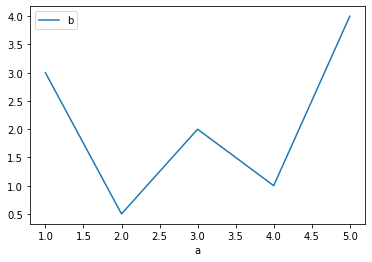

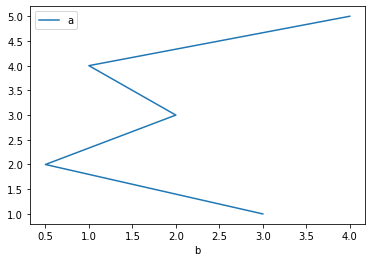

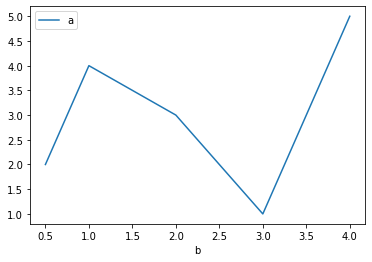

In [139]:
q = Qfrom([
    {'a': 1, 'b':3},
    {'a': 2, 'b':0.5},
    {'a': 3, 'b':2},
    {'a': 4, 'b':1},
    {'a': 5, 'b':4},
])

q.plot()
q.plot('b')
q.order_by('b').plot('b')

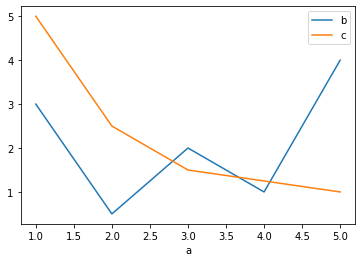

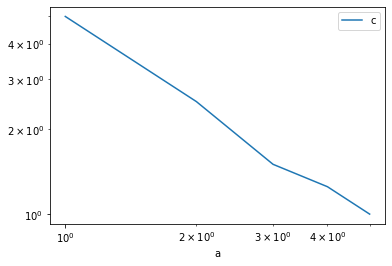

In [140]:
q = Qfrom([
    {'a': 1, 'b':3, 'c':5},
    {'a': 2, 'b':0.5, 'c':2.5},
    {'a': 3, 'b':2, 'c':1.5},
    {'a': 4, 'b':1, 'c':1.25},
    {'a': 5, 'b':4, 'c':1},
])

q.plot()
q.select('a, c').plot(x_scale_log=True, y_scale_log=True)

plot_bar(x, show_legend, title, space, y_scale_log)

Signatur:\
x: string\
show_legend: bool\
title: string\
space: float[0,1]\
y_scale_log: bool

Über den Parameter x kann festgelegt werden, welche Spalte als X-Achse verwendet wird.


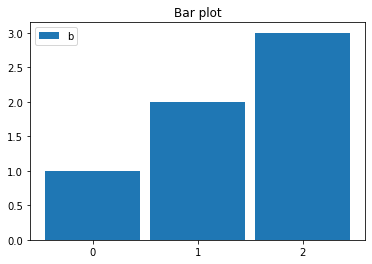

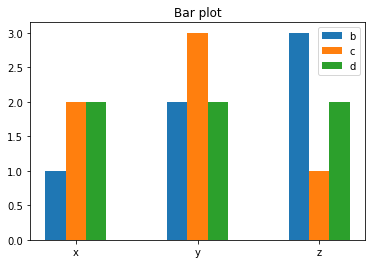

In [141]:
q = Qfrom([
    {'a':'x', 'b':1, 'c':2, 'd':2},
    {'a':'y', 'b':2, 'c':3, 'd':2},
    {'a':'z', 'b':3, 'c':1, 'd':2},
])

q.select('b').plot_bar()
q.plot_bar('a', space=0.5)

plot_histogram(density, bins, stacked, show_legend, title, y_scale_log, ylabel)

Signatur:\
density: bool\
bins: int\
stacked: bool\
show_legend: bool\
title: string\
y_scale_log: bool\
ylabel: string

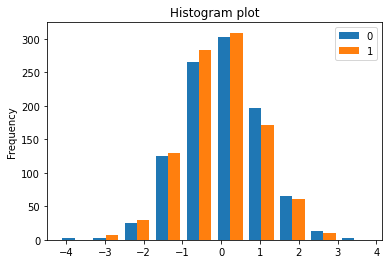

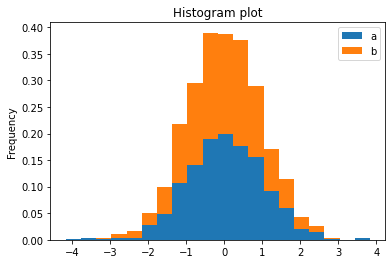

In [142]:
q = Qfrom(zip(np.random.normal(size=1000), np.random.normal(size=1000)))

q.plot_histogram(bins=10)
q.select('0 as a, 1 as b').plot_histogram(density=True, bins=20, stacked=True)

plot_boxplot(title, y_scale_log)

Signatur:\
title: string\
y_scale_log: bool

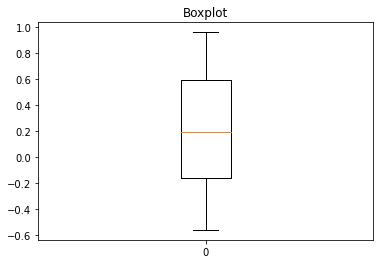

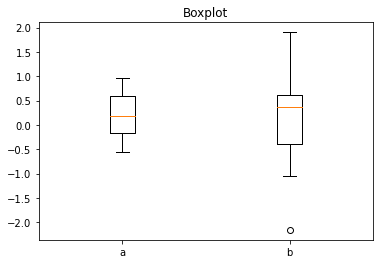

In [143]:
q = Qfrom(zip(np.random.normal(size=10), np.random.normal(size=10)))

q.select('0').plot_boxplot()
q.select('0 as a, 1 as b').plot_boxplot()

plot_scatter

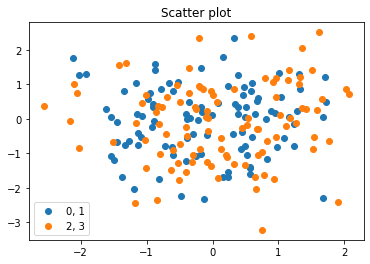

In [144]:
q = Qfrom(zip(np.random.normal(size=100), np.random.normal(size=100), np.random.normal(size=100), np.random.normal(size=100)))

q.plot_scatter()

**Fortgeschrittene Funktionen**

\_\_call\_\_

Die dunder-call Methode ist für Qfrom als Möglichkeit definiert eigene Funktionen als Extension-Methoden auf einem Qfrom-Objekt aufzurufen. Dabei können neben der Funktion weitere Parameter in call geschrieben werden, welche der Funktion übergeben werden.

In [145]:
tab = '''
name,age,gender
Jules,25,d
Emma,48,w
Bob,29,m
'''
q = Qfrom(tab)
print(q)

Qfrom(	{'name': 'Jules', 'age': 25, 'gender': 'd'}
	{'name': 'Emma', 'age': 48, 'gender': 'w'}
	{'name': 'Bob', 'age': 29, 'gender': 'm'})


In [146]:
def col_to_lower(qfrom, col_name):
    return qfrom.edit(col_name, lambda x:x[col_name].lower())

q_ = q(col_to_lower, 'name')
print(q_)

Qfrom(	{'name': 'jules', 'age': 25, 'gender': 'd'}
	{'name': 'emma', 'age': 48, 'gender': 'w'}
	{'name': 'bob', 'age': 29, 'gender': 'm'})


Wird call kein Parameter übergeben, so gibt diese die in Qfrom enthaltene Array zurück.

In [147]:
print(q())

[{'name': 'Jules', 'age': 25, 'gender': 'd'}
 {'name': 'Emma', 'age': 48, 'gender': 'w'}
 {'name': 'Bob', 'age': 29, 'gender': 'm'}]
